In [1]:

from ConsIndShockModel import IndShockConsumerType
import time
import numpy as np
import matplotlib.pyplot as plt
from copy import copy, deepcopy
from HARK.distribution import DiscreteDistribution, MeanOneLogNormal,Lognormal,Uniform,combine_indep_dstns
from scipy import sparse as sp
from HARK.utilities import get_lorenz_shares
from tqdm import tqdm


In [2]:
# Define a dictionary with calibrated parameters
cstwMPC_calibrated_parameters = {
    "CRRA": 1.0,  # Coefficient of relative risk aversion
    "Rfree":  1.01 / (1.0 - 1.0 / 160.0) ,  # Survival probability,
    "PermGroFac": [1.0],#[1.000**0.25],  # Permanent income growth factor (no perm growth),
    "PermGroFacAgg": 1.0,
    "BoroCnstArt": 0.0,
    "CubicBool": False,
    "vFuncBool": False,
    "PermShkStd": [
        (0.01 * 4 / 11) ** 0.5
    ],  # Standard deviation of permanent shocks to income
    "PermShkCount": 5,  # Number of points in permanent income shock grid
    "TranShkStd": [
        (0.01 * 4) ** 0.5
    ],  # Standard deviation of transitory shocks to income,
    "TranShkCount": 5,  # Number of points in transitory income shock grid
    "UnempPrb": 0.07,  # Probability of unemployment while working
    "IncUnemp": 0.15,  # Unemployment benefit replacement rate
    "UnempPrbRet": 0.00,
    "IncUnempRet": 0.0,
    "aXtraMin": 0.00001,  # Minimum end-of-period assets in grid
    "aXtraMax": 3000,  # Maximum end-of-period assets in grid
    "aXtraCount":950,  # Number of points in assets grid
    "aXtraExtra": [None],
    "aXtraNestFac": 2,  # Number of times to 'exponentially nest' when constructing assets grid
    "LivPrb": [1.0 - 1.0 / 160.0],  # Survival probability
    "DiscFac": 0.99,  # Default intertemporal discount factor; dummy value, will be overwritten
    "cycles": 0,
    "T_cycle": 1,

}


In [3]:
example = IndShockConsumerType(**cstwMPC_calibrated_parameters)

In [4]:

example.compute_steady_state()
CJACR,AJACR = example.calc_jacobian('Rfree',300)

GPFRaw                 = 1.006189 
GPFNrm                 = 1.009475 
GPFAggLivPrb           = 0.999900 
Thorn = APF            = 1.006189 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.983812 
WRPF                   = 0.068867 
DiscFacGPFNrmMax       = 0.980708 
DiscFacGPFAggLivPrbMax = 0.990099 


In [5]:
example.C_ss

1.1889040021849875

example.C_g

In [7]:
tm = example.tran_matrix
dstn_ss = example.vec_erg_dstn

AggA=[]
AggC = []
dstn = dstn_ss
for i in range(50):
    dstn = np.dot(tm,dstn)
    AggA.append(np.dot(example.aPol_Grid,dstn))
    AggC.append(np.dot(example.cPol_Grid,dstn))

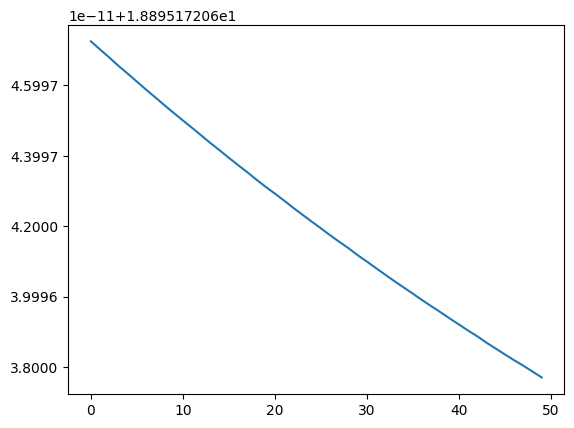

In [8]:
plt.plot(AggA)


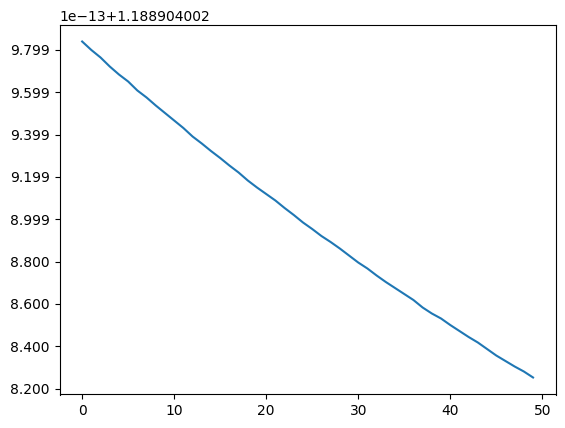

In [9]:
plt.plot(AggC)


In [10]:
AggC

[array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904]),
 array([1.188904])]

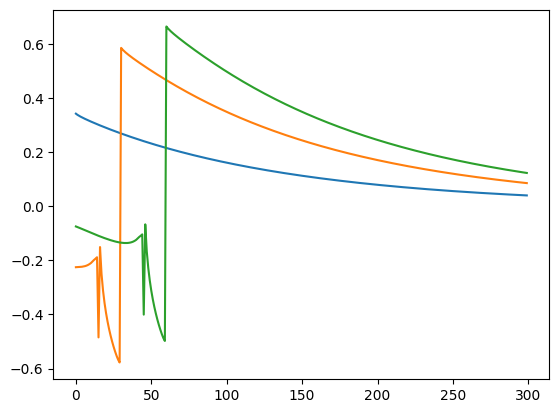

In [11]:
plt.plot(CJACR.T[0])
plt.plot(CJACR.T[30])
plt.plot(CJACR.T[60])


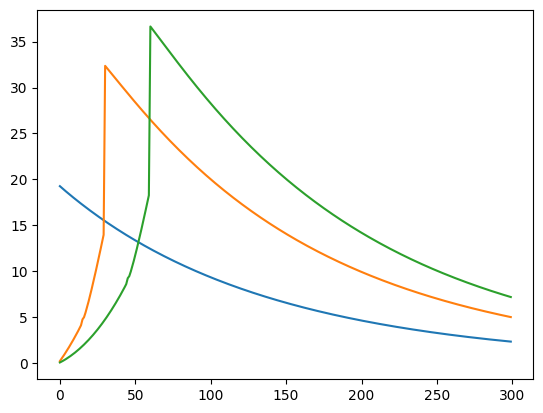

In [12]:
plt.plot(AJACR.T[0])
plt.plot(AJACR.T[30])
plt.plot(AJACR.T[60])